<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Camino_mas_corto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema del camino más corto**

#1. Descripción del problema

El problema del camino más corto busca encontrar la distancia más corta desde un **nodo $K$** a un **nodo $S$**. El problema que existe en esto es que, dependiendo del tipo de grafo, *si este contiene arcos negativos o no*, va a tener que resolverse mediante un algoritmo u otro.

en este informe se implementará el **algoritmo de Dijkstra**, el cual *solo sirve para grafos con arcos positivos*, mientras que el **algoritmo Bellman-Ford** soporta arcos tanto negativos como positivos.

* Entrada: un grafo dirigido, un nodo inicial $(K)$.
* Salida: una lista con la distancia del nodo $K$ hasta el resto de nodos.


#2. Descripción del algoritmo

##2.1. Algoritmo Bellman-Ford

El **algoritmo de Bellman-Ford** es un algoritmo que utiliza el paradigma de la **programacion dinamica** para realizar la busqueda del camino mas corto que existe entre los nodos, por ello esta algoritmo es capaz de lidiar con **ciclos negativos**

El **algoritmo de Bellman-Ford** funciona de la siguiente manera:

* **Los parámetros que Se recibe son:** un grafo, la cantidad de vértices, la cantidad de arcos, un nodo fuente.

1. Se inicializa un arreglo de distancias, el **tamaño** de este es igual a la **cantidad de vértices** del grafo, con todos los valores menos el del nodo fuente como infinito

2. Se calcula la distancia del nodo inicial hasta un nodo $X$, la cual se calcula como la distancia del nodo anterior mas el peso del arco, esta distancia se guarda en el arreglo.

3. Si al calcular la distancia del nodo inicial hasta el nodo $X$, se encuentra un camino menor al que este guardando en el arreglo, se actualiza la distancia.

4. Al final se revisa si existe algún ciclo negativo en el grafo, esto se verifica realizando el siguiente proceso, $X$ = nodo de inicio; $Y$ = nodo final; $arc$ = arco entre los dos nodos. **Si** la distancia de $X + arc$ es $<$ a la distancia de $Y$ existe un **un ciclo negativo:**

* Si el algoritmo detecta **un ciclo negativo** se muestra por pantalla que se encontró un ciclo y se detiene el algoritmo.

* Si el algoritmo **no encontró un ciclo negativo** se muestra la distancia mínima de cada nodo.

a continuación la implementación del código


In [ ]:
import matplotlib.pyplot as plt

def bellmanFord(grafo,cVertices,cArcos,src,verbose = False, grafico = False):
  dist = [float("inf")] * cVertices  #se inicializa la lista de distancias
  dist[src] = 0
  flag = False

  if verbose:
    print(f"el nodo base es {grafo[src][0]}")
    print(f"cantidad de nodos {cVertices}, cantidad de arcos {cArcos}\n")

  for i in range(cVertices-1): #se recorren los nodos y sus arcos calculando la distancia de los nodos
    for j in range(cArcos):
      if dist[grafo[j][0]] + grafo[j][2] < dist[grafo[j][1]]: #si la distancia que guarda el nodo mas el peso del arco es menor que la distancia que guarde el nodo final
        if verbose:
          print(f"comparando distancia del nodo {grafo[j][0]} hasta el nodo {grafo[j][1]}")
          print(f"{dist[grafo[j][0]] + grafo[j][2]} < {dist[grafo[j][1]]}")
          print("este es el camino mas corto")
        dist[grafo[j][1]] = dist[grafo[j][0]] + grafo[j][2] #se guarda esta distancia como su nueva distancia
  
  if verbose:
    print("\nahora verificaremos que no exista ningun ciclo negativo")

  for i in range(cArcos): #se busca el peso entre dos nodos 
    x = grafo[i][0]
    y = grafo[i][1]
    aux = grafo[i][2]
    if dist[x] != float("inf") and dist[x] + aux < dist[y]: #se verifica la existencia de un arco negativo
      if verbose:
        print("se ha encontrado un ciclo negativo")
      flag = True

  if verbose and not(flag):
    print("no se ha encontrado ciclo negativo\n")

  if verbose or not(grafico):    
    print("source -> nodo final distancia")
    for i in range(cVertices):
      print(f"{src} \t{i} \t{dist[i]}")

grafo,src = instance_generator(10)
bellmanFord(grafo,10,len(grafo),src)

source -> nodo final distancia
9 	0 	90
9 	1 	182
9 	2 	152
9 	3 	273
9 	4 	27
9 	5 	60
9 	6 	124
9 	7 	140
9 	8 	184
9 	9 	0


##Ejemplo del punto **2.1**

para dar mas claridad sobre como funciona el **algoritmo Bellman-Ford**,se mostrara un ejemplo a mano de la ejecucion del algoritmo.

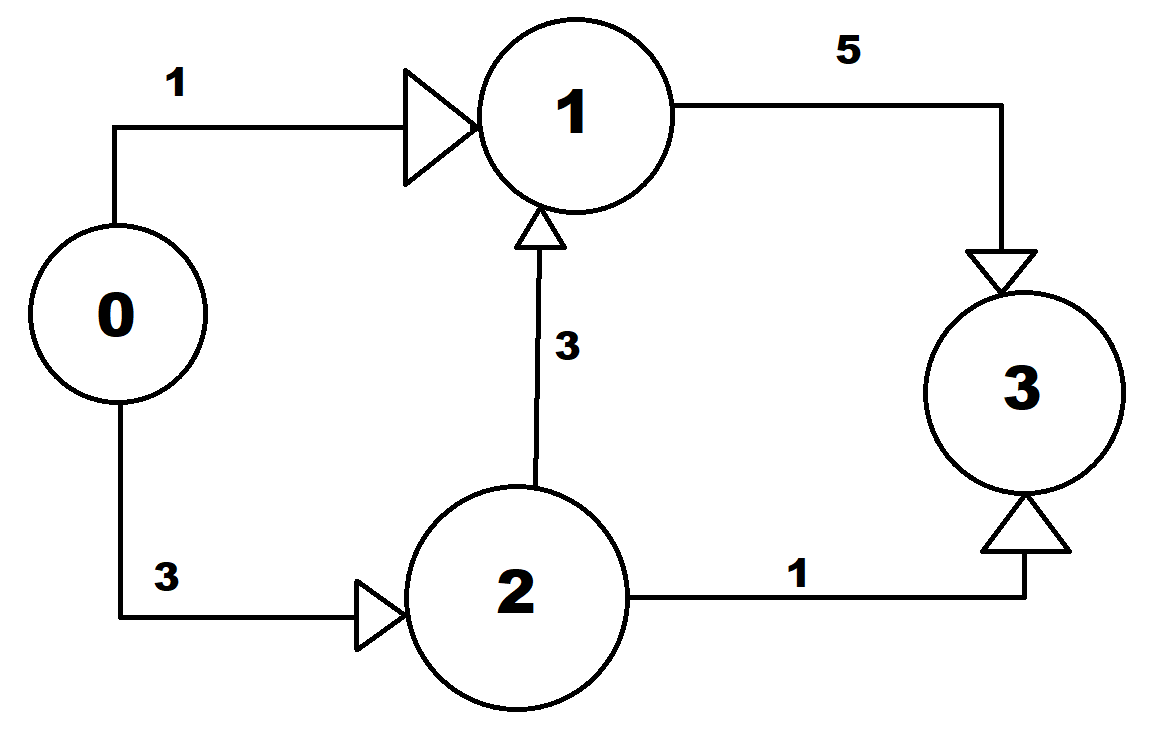

El algoritmo para resolver este problema seguiria los siguientes pasos:

primero decimos que la distancia desde 0 al resto de los nodos es igual a infinito, el nodo 0 va a tener distancia 0.

$dist(0) = 0, dist(1,2,3) = \infty$

ahora empezamos a analizar los arcos que salen del nodo 0, como se puede apreciar hay dos, uno que va al nodo 1 y otro que va al nodo 2.

Asi que analizaremos si la distancia del nodo 0 mas el peso del arco es menor que la distancia que tenga guardada el nodo 1 y 2.

$dist(0) + arco(0,1) ~~> 0 + 1 = 1 ~~> 1 < \infty ~~> dist(1) = 1$

$dist(0) + arco(0,2) ~~> 0 + 3 = 3 ~~> 3 < \infty ~~> dist(2) = 3$

ahora repetimos el proceso con el nodo 1, este nodo solo tiene un solo arco, dirigido hacia el nodo 3.

$dist(1) + arco(1,3) ~~> 1 + 5 = 6 ~~> 6 < \infty ~~> dist(3) = 6$

repetimos el proceso con el nodo 2, este nodo tiene dos arcos, uno dirigido al nodo 1 y otro dirigido al nodo 3

$dist(2) + arco(2,1) ~~> 3 + 3 = 6 ~~> 6 > 1$.

como la distancia de este camino es mayor al que teniamos previamente **no ocurre ningun cambio**.

$dist(2) + arco(2,3) ~~> 3 + 2 = 3 ~~> 5 < 6 ~~> dist(3) = 5$

como la distancia de este camino es menor al que teniamos previamente **reemplazamos la distancia anterior con la nueva**.

##2.2. Algoritmo Dijkstra

A diferencia del **algortimo Bellman-Ford** el **algoritmo Dijkstra**, este algoritmo a diferencia del anteriormente visto, utiliza una implementacion **greedy**, esto quiere decir que la solucion al problema que este algoritmo entregue va a ser la primera que encuentre.

esto lo hace mas eficiente que el **algortimo Bellman-Ford**, pero tambien lo hace incapaz de lidiar con **ciclos negativos**.

El **algoritmo de Bellman-Ford** funciona de la siguiente manera:

* **Los parámetros que Se recibe son:** un grafo, la cantidad de vértices, un nodo fuente.

1. Se inicializa un arreglo de distancias, el **tamaño** de este es igual a la **cantidad de vértices** del grafo, con todos los valores menos el del nodo fuente como infinito
2. Se analiza la distancia del nodo fuente a un nodo $X$, la cual se calcula como la distancia del nodo anterior mas el peso del arco, esta distancia se guarda en el arreglo.
3. una vez calculada la distancia de un nodo se le marca a este como que esta visitado, esto para evitar quedarnos atascado en un bucle infinito.



nodo 	Distancia desde el nodo fuente
0 	 73
1 	 inf
2 	 63
3 	 87
4 	 0
5 	 inf
6 	 34
7 	 51
8 	 95
9 	 75


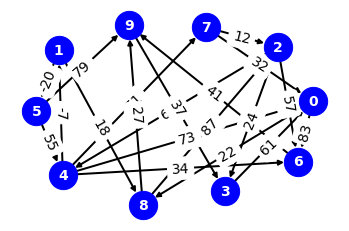

In [4]:
def listToMatrix(graph, V):
    edges = len(graph)
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in graph:
            newGraph[x][y] = peso

    return newGraph

def minDistance(V, dist, visited):
    min = float("inf") #se inicializa con el valor default que tiene los nodos
    min_index = 0

    for u in range(V): #se busca la posicion del nodo con la menor distancia encontrada hasta el momento y que no haya sido visitado
        if dist[u] < min and visited[u] == False:
            min = dist[u]
            min_index = u
    
    return min_index #se regresa la posicion de este nodo

def Dijkstra(graph, V ,src, verbose = False, grafico = False):
    dist = [float("inf")] * V #se inicializa un arreglo con todos las distancias de los nodos iguales a infinito exceptuando el nodo fuente
    dist[src] = 0 

    sptSet = [False] * V #se inicializa un arreglo que marque si los nodos fueron visitados o no
 
    for cout in range(V):
 
        x = minDistance(V, dist, sptSet) #se llama a la funcion para ver cual es nodo con la menor distancia y que no haya sido visitado
 
        sptSet[x] = True #se marca a este nodo como visitado

        for y in range(V):
            if graph[x][y] > 0 and sptSet[y] == False and \
            dist[y] > dist[x] + graph[x][y]: #y se busca la distancia que tiene el con sus nodos adyacentes, el que tenga menor distancia
                dist[y] = dist[x] + graph[x][y] #sera el siguiente por el cual se busque su distancia
    
    if verbose or not(grafico): #se muestran los resultados y el camino mas corto que existe desde un nodo hasta el nodo fuente
      print("nodo \tDistancia desde el nodo fuente")
      for node in range(V):
          print(node, "\t", dist[node])

grafo,src = instance_generator(10)
grafoM = listToMatrix(grafo,10)
Dijkstra(grafoM,10,src,True)

g = graph_to_nxdigraph(grafo,10)

pos = nx.spring_layout(g, 20)
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels,font_size=14)
nx.draw(g,pos, node_color= "blue", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color="black")

##2.3. ejecucion con verbose, Algoritmo Bellman Ford

Este opcion esta disponible cuando $verbose = True$, y para esta primera ejecucion se estara viendo el **algoritmo Bellman Ford**.

el nodo base es 8
cantidad de nodos 10, cantidad de arcos 20

comparando distancia del nodo 3 hasta el nodo 4
30 < inf
este es el camino mas corto
comparando distancia del nodo 4 hasta el nodo 7
118 < inf
este es el camino mas corto
comparando distancia del nodo 4 hasta el nodo 0
113 < inf
este es el camino mas corto
comparando distancia del nodo 3 hasta el nodo 6
58 < inf
este es el camino mas corto
comparando distancia del nodo 7 hasta el nodo 5
191 < inf
este es el camino mas corto
comparando distancia del nodo 5 hasta el nodo 2
211 < inf
este es el camino mas corto
comparando distancia del nodo 0 hasta el nodo 8
206 < inf
este es el camino mas corto
comparando distancia del nodo 6 hasta el nodo 2
146 < 211
este es el camino mas corto
comparando distancia del nodo 8 hasta el nodo 1
254 < inf
este es el camino mas corto
comparando distancia del nodo 1 hasta el nodo 9
344 < inf
este es el camino mas corto

ahora verificaremos que no exista ningun ciclo negativo
no se ha encontrado cic

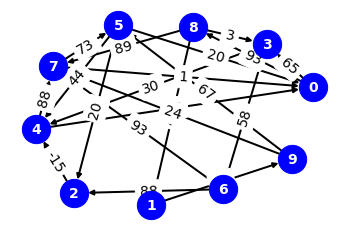

In [ ]:
grafo,src = instance_generator(10)
bellmanFord(grafo,10,len(grafo),src,True)

g = graph_to_nxdigraph(grafo,10)

pos = nx.spring_layout(g, 20)
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels,font_size=14)
nx.draw(g,pos, node_color= "blue", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color="black")

#3. Análisis de tiempo

##3.1 Algoritmo Bellman-Ford
El algoritmo de Bellman-Ford tiene los siguientes tiempos de ejecuciones para los distintos casos:

Peor Caso: En este caso el algoritmo toma una complejidad temporal de $O(n^3)$, esto se produce cuando en la primera iteración ya se calculó el camino más corto pero el algoritmo no se detiene y sigue con el análisis, lo que significa que la complejidad completa es de:

$O(EV) = O(V^2) O(V)$

donde $O(V^2)$ viene siendo de el algoritmo habiendo calculado en las primeras iteraciones el camino más corto pero continua con las iteraciones.

Caso Promedio: El caso promedio viene dado por $O(E*V)$, ósea la cantidad de nodos por la cantidad de vértices. Este caso nace de arreglar el problema que mantiene el peor caso, donde este luego de calcular el camino más corto este sigue iterando, en el caso promedio se verifica si se están realizando cambios, en caso de que no se realicen cambios el algoritmo entiende que no existe un mejor camino más corto, por lo que termina con las iteraciones.

Mejor Caso: El mejor caso viene dado por $O(E)$, esto sucede cuando los nodos toman un camino lineal, es decir cada nodo tiene solo un arco.

Complejidad Espacial: $O(V)$, siendo esto la cantidad de nodos.
##3.2 Algoritmo de Dijkstra

El algoritmo Dijkstra presenta una complejidad espacial de $O(V^2)$, esto se debe a que para visitar cada nodo y procesarlo ambos de estos procesos es de $O(V)$, por lo que finalmente tendríamos que:

$O(V)*O(V) = O(V^2)$

Al tener que visitar y procesar estos "v" nodos terminamos teniendo que la complejidad de este algoritmo es de $O(V^2)$.

Complejidad Espacial: $O(V^2)$, esto se debe que el algoritmo de Dijkstra utiliza una matriz para ir almacenando los datos.


#4. Correctitud

Si el algoritmo de Bellman-Ford recibe un grafo sin ciclos negativos este calcula correctamente su camino más corto.

Esto puede ser demostrado mediante inducción.

Caso Base: si k = 0 tenemos que $dist_{k}$ = 0 para V = S, esto es debido que el camino de un nodo a sí mismo es de 0.

Hipótesis Inductiva: Después de cada iteración "i", para cada nodo "v" se tiene que $dist(s,v)$ es el camino más corto.

Paso Inductivo: Supongamos que la hipótesis se mantiene para "i+1"
Sea u un nodo de v, asumiremos que existe una ruta más corta entre s y u, sea u el nodo anterior a v en esta ruta.

Por hipótesis inductiva, sabemos que $dist(u,i)$ es la distancia más corta entre el nodo raíz s y el nodo u. En la iteración i+1, nos aseguramos que se cumple $dist(v,i+1) =< dist(u,i) + w(u,v)$ por el paso de reajuste del algoritmo, y tenemos también que $dist(v,i+1)$ es mayor o igual al largo del camino que utiliza al meno i+1. Por lo tanto, $dist(v,i+1)$ es el largo del camino más corto entre s y v utilizando máximo i+1 arcos.

Después de n-1 iteraciones, para cada nodo v, la $dist(v,n-1)$ es el largo del camino más corto desde el nodo raíz hasta el nodo v utilizando como máximo n-1 arcos.
me siento 0 seguro de esta correctitud, y eso que copie y pegue de la presentación


#5. Experimentos

##5.1. tiempo de ejecución 

En el siguiente experimento se comprueba cual es tiempo de ejecución promedio del **algoritmo Bellman Ford**, si este algoritmo está bien implementado entonces el tiempo promedio debería ser **$O(E*V)$**.

* El tiempo de ejecución del **algoritmo Bellman Ford** (la gráfica azul)

para un problema que tiene un tamaño $n \in [5,25]$


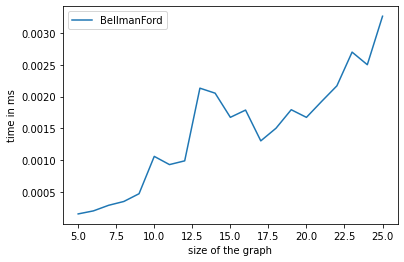

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]

for n in range(5,26):

  grafo,src = instance_generator(n)
  t = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({grafo},{n},{len(grafo)},{src})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["BellmanFord"])

plt.xlabel('size of the graph')
plt.ylabel('time in ms')
plt.show()

###Análisis

como se puede apreciar en el gráfico, el crece de manera lineal, aunque tiene picos en ciertas partes de su ejecución, esto se puede explicar por su complejidad temporal, que en el caso promedio **$O(E*V)$** y los picos serían los momentos en el que se dio el peor caso **$O(V^2)$**.


##5.2. comparación entre Bellman y Dijkstra

En el siguiente experimento se comparará el tiempo ejecución entre el **algoritmo Bellman Ford** y el **algoritmo Dijkstra**.

* El tiempo de ejecución del **algoritmo Bellman Ford** (la gráfica azul)
* El tiempo de ejecución **algoritmo Dijkstra** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,25]$


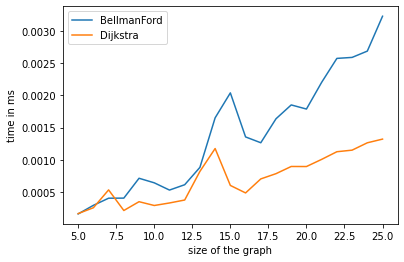

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y1=[]

for n in range(5,26):

  grafo,src = instance_generator(n)

  #la función repeat está ejecutando 10 veces al algoritmo bellmanFord y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({grafo},{n},{len(grafo)},{src},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  #condiciones necesarias para el Dijkstra
  grafo = listT_to_matrix(grafo,n)
  Dijkstra(grafo,n,src)

  #la función repeat está ejecutando 10 veces al algoritmo Dijkstra y retorna el mejor tiempo obtenido para cada ejecucion.
  t = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({grafo},{n},{src})", repeat=1, number=10)

  y1.append(t)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["BellmanFord","Dijkstra"])

plt.xlabel('size of the graph')
plt.ylabel('time in ms')
plt.show()

###Análisis

como se puede ver en el gráfico, el algoritmo **Dijkstra** es más eficiente en su tiempo de ejecución que el **Bellman Ford**, esto se debe a que mientras el **Dijkstra** encuentra la distancia de un nodo al resto de nodos del grafo, el **Bellman Ford** por otra parte busca la distancia todos los nodos entre todos los nodos.


#6. Anexos

In [2]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [3]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph